### Project 1

Project description: 
- Read data into Jupyter notebook, use pandas to import data into a data frame
- preprocess data: explore data, address missing data, categorical data, if there is any, and data scaling. Justify the type of scaling used in this project. 
- train your dataset using all the linear regression models you've learned so far. If your model has a scaling parameter(s) use Grid Search to find the best scaling parameter. Use plots and graphs to help you get a better glimpse of the results. 
- Then use cross validation to find average training and testing score. 
- Your submission should have at least the following regression models: KNN repressor, linear regression, Ridge, Lasso, polynomial regression, SVM both simple and with kernels. 
- Finally find the best repressor for this dataset and train your model on the entire dataset using the best parameters and predict the market price for the test_set.
- submit IPython notebook. Use markdown to provide an inline report for this project.

# Loading Data using Pandas


In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

data = pd.read_csv('bitcoin_dataset.csv')
data_test = pd.read_csv('test_set.csv')

data_test = data_test.drop('Date',axis=1)

#### Getting a basic feel of the data, find out how many missing values, shape of the data etc

In [3]:
data.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/17/2010 0:00,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,...,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,2/18/2010 0:00,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,...,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,2/19/2010 0:00,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,...,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,2/20/2010 0:00,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,...,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,2/21/2010 0:00,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,...,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


In [4]:
data.shape

(2906, 24)

In [5]:
data.isnull().sum()

Date                                                    0
btc_market_price                                        0
btc_total_bitcoins                                     27
btc_market_cap                                          0
btc_trade_volume                                       21
btc_blocks_size                                        29
btc_avg_block_size                                      0
btc_n_orphaned_blocks                                   0
btc_n_transactions_per_block                            0
btc_median_confirmation_time                           12
btc_hash_rate                                           0
btc_difficulty                                         16
btc_miners_revenue                                      0
btc_transaction_fees                                   10
btc_cost_per_transaction_percent                        0
btc_cost_per_transaction                                0
btc_n_unique_addresses                                  0
btc_n_transact

# KNN Imputation for Treating Missing Values

In [6]:
# We are dropping Time as it doesnt explain the Bitcoin price and cannot be used as an independent variable
data = data.iloc[:,1:]

# We are using KNN Imputation Technique as any other form of Imputation Technique wont give you correct results for this 
# specific dataset.
# For example if use mean and lets assume bitcoin_difficulty has missing value in 2015, If we were to impute using mean
# it would show a high value whereas the value should have been less becuase we are trying to impute it in the earlier stages
# of bitcoin advent
from fancyimpute import KNN
data_filled_KNN = KNN(k=5).complete(data)
data_filled_KNN = pd.DataFrame(data_filled_KNN,
                               columns=['btc_market_price','btc_total_bitcoins','btc_market_cap','btc_trade_volume','btc_blocks_size','btc_avg_block_size','btc_n_orphaned_blocks','btc_n_transactions_per_block','btc_median_confirmation_time','btc_hash_rate','btc_difficulty','btc_miners_revenue','btc_transaction_fees','btc_cost_per_transaction_percent','btc_cost_per_transaction','btc_n_unique_addresses','btc_n_transactions','btc_n_transactions_total','btc_n_transactions_excluding_popular','btc_n_transactions_excluding_chains_longer_than_100','btc_output_volume','btc_estimated_transaction_volume','btc_estimated_transaction_volume_usd'
])
#data_filled_KNN.to_csv('data_filled_KNN.csv')

ImportError: No module named 'fancyimpute'

In [18]:
data_filled_KNN.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
btc_market_price,2906.0,8.391042e+02,2.304972e+03,0.000000e+00,6.653465e+00,2.351300e+02,5.941912e+02,1.949868e+04
btc_total_bitcoins,2906.0,1.146579e+07,4.207787e+06,2.043200e+06,8.341775e+06,1.237281e+07,1.517080e+07,1.683769e+07
btc_market_cap,2906.0,1.344352e+10,3.866841e+10,0.000000e+00,5.363081e+07,3.346869e+09,8.075525e+09,3.270000e+11
btc_trade_volume,2906.0,7.352185e+07,2.914153e+08,0.000000e+00,2.952172e+05,9.975375e+06,2.828387e+07,5.352016e+09
btc_blocks_size,2906.0,3.515740e+04,4.353877e+04,0.000000e+00,7.500000e+02,1.466450e+04,5.742650e+04,1.544446e+05
btc_avg_block_size,2906.0,3.503659e-01,3.531685e-01,2.163350e-04,2.417726e-02,1.960218e-01,6.760651e-01,1.110327e+00
btc_n_orphaned_blocks,2906.0,3.640743e-01,8.422593e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00
btc_n_transactions_per_block,2906.0,6.716737e+02,6.895613e+02,1.000000e+00,5.400000e+01,3.750000e+02,1.232995e+03,2.722625e+03
btc_median_confirmation_time,2906.0,7.526797e+00,4.983583e+00,0.000000e+00,6.066667e+00,7.916667e+00,1.023333e+01,4.773333e+01
btc_hash_rate,2906.0,1.244070e+06,2.924141e+06,2.250000e-05,1.160880e+01,2.176189e+04,1.035363e+06,2.160975e+07


In [19]:
# To ensure we dont have any missing values in the dataset filled with KNN imputation
data_filled_KNN.isnull().sum()

btc_market_price                                       0
btc_total_bitcoins                                     0
btc_market_cap                                         0
btc_trade_volume                                       0
btc_blocks_size                                        0
btc_avg_block_size                                     0
btc_n_orphaned_blocks                                  0
btc_n_transactions_per_block                           0
btc_median_confirmation_time                           0
btc_hash_rate                                          0
btc_difficulty                                         0
btc_miners_revenue                                     0
btc_transaction_fees                                   0
btc_cost_per_transaction_percent                       0
btc_cost_per_transaction                               0
btc_n_unique_addresses                                 0
btc_n_transactions                                     0
btc_n_transactions_total       

# Univariate Analysis to understand the distribution of Variables

E:\Anaconda\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


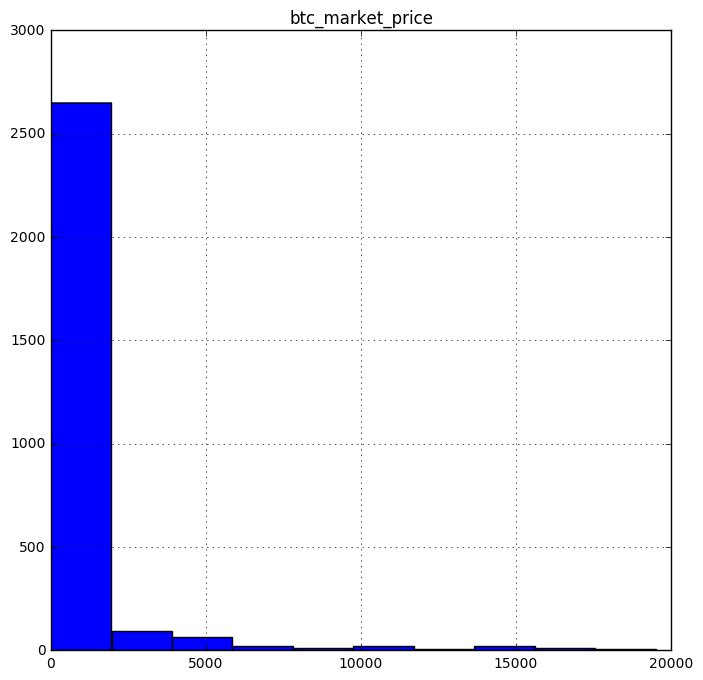

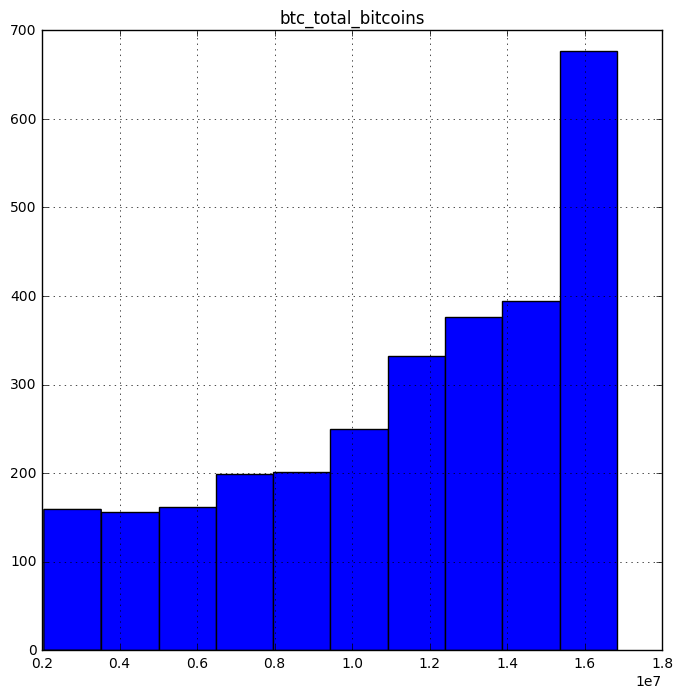

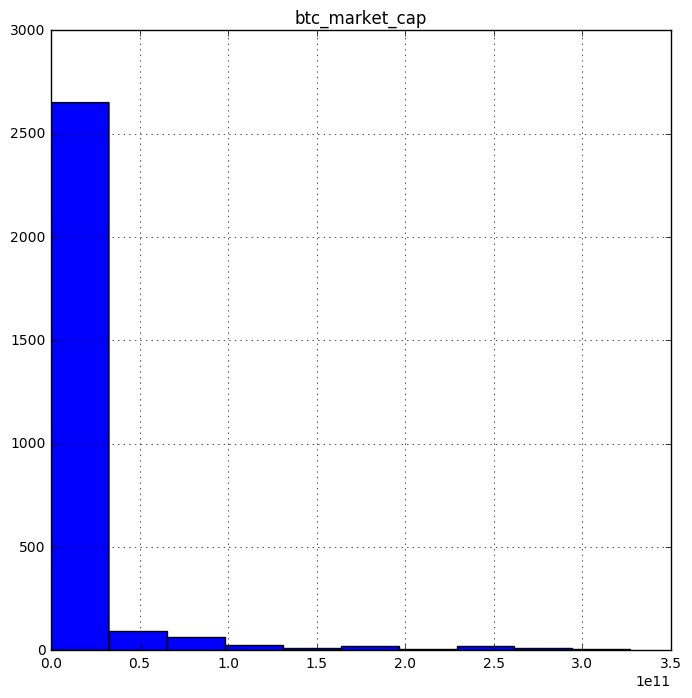

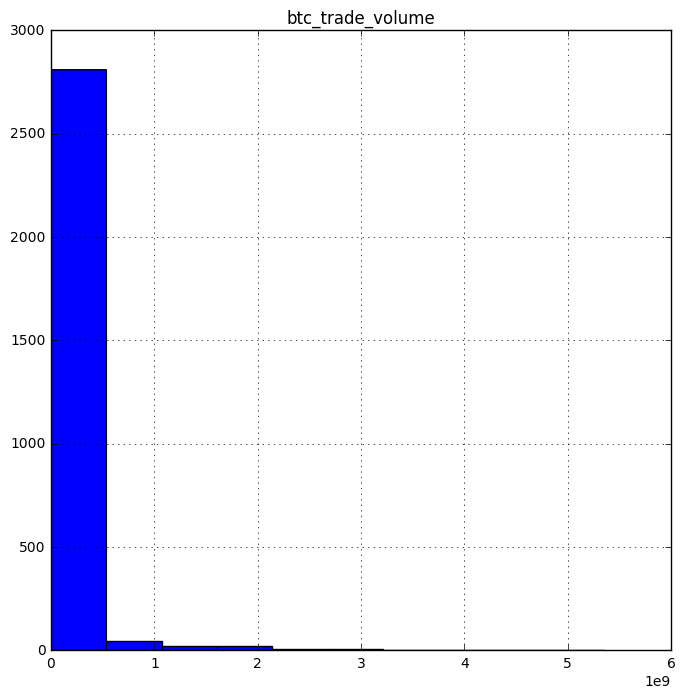

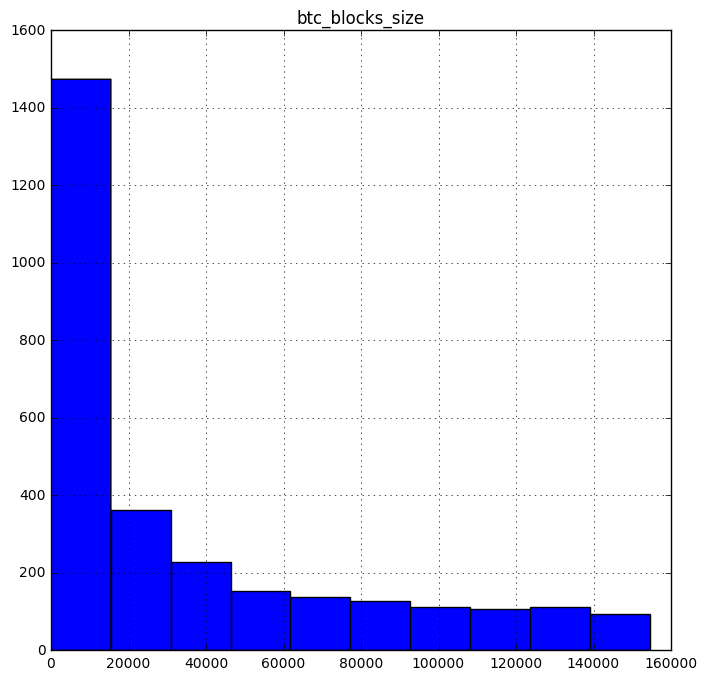

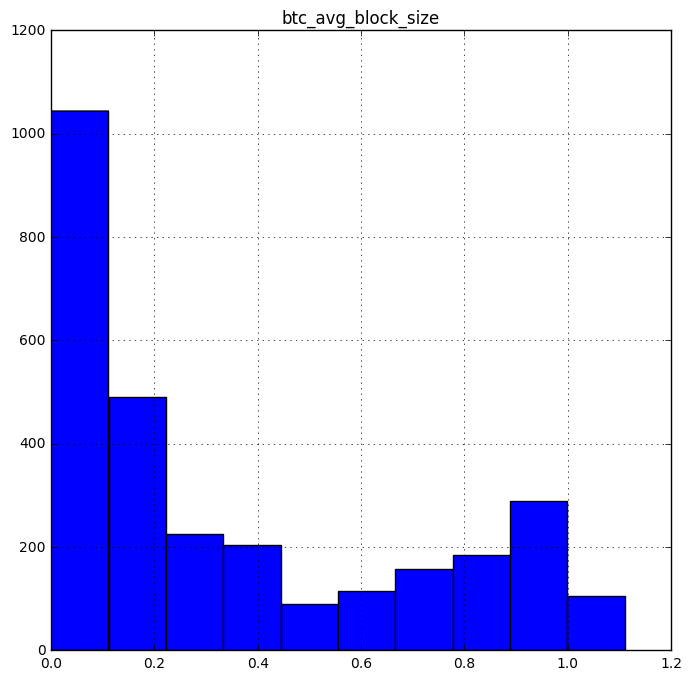

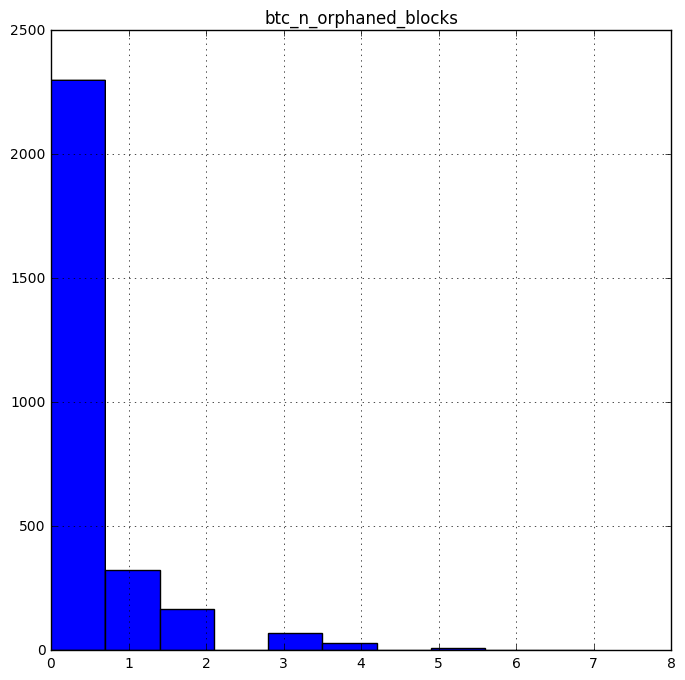

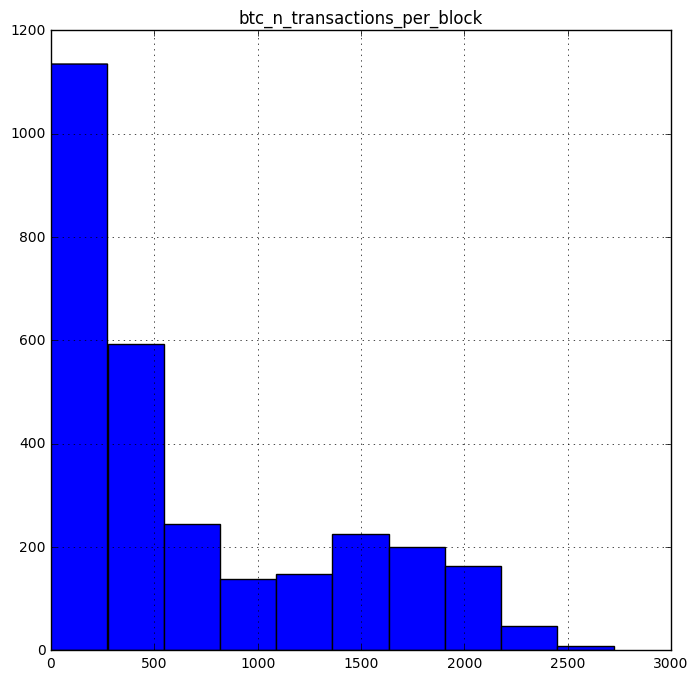

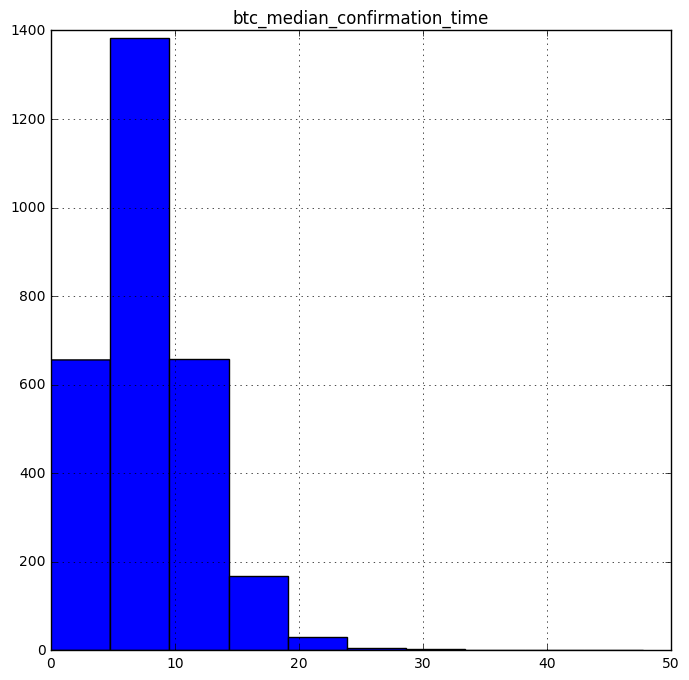

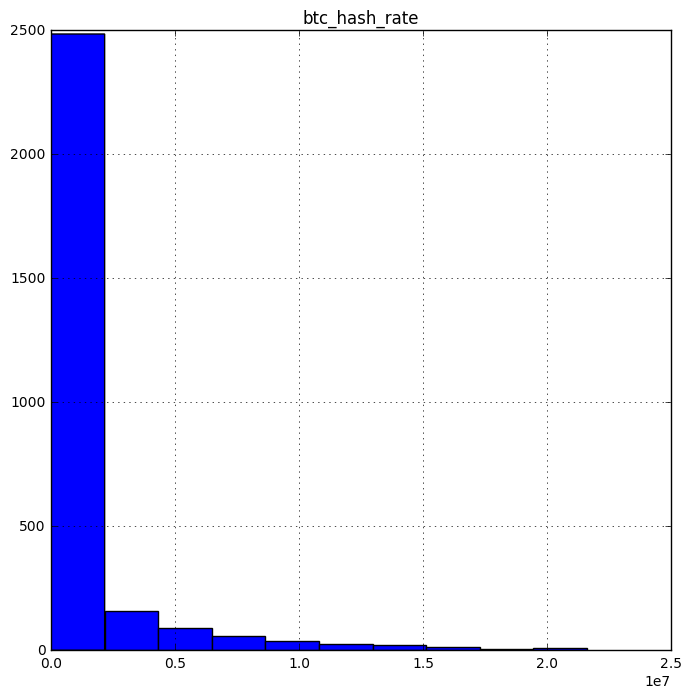

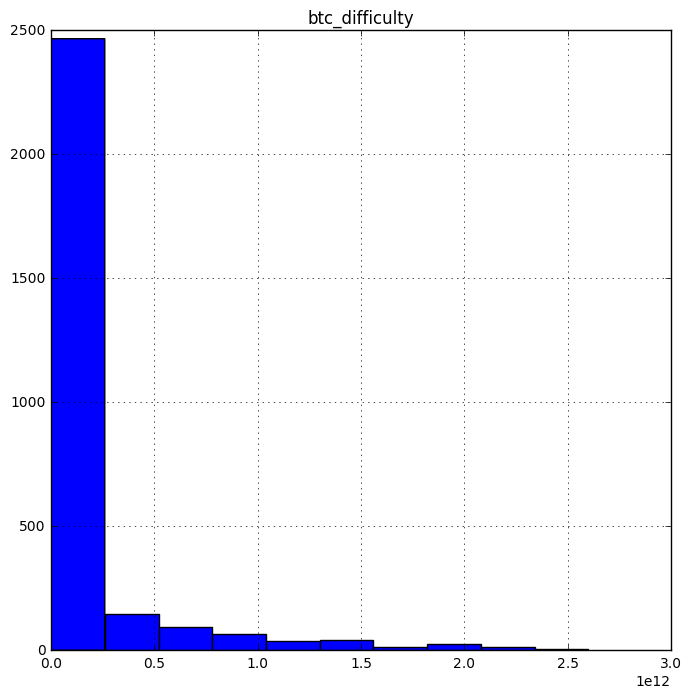

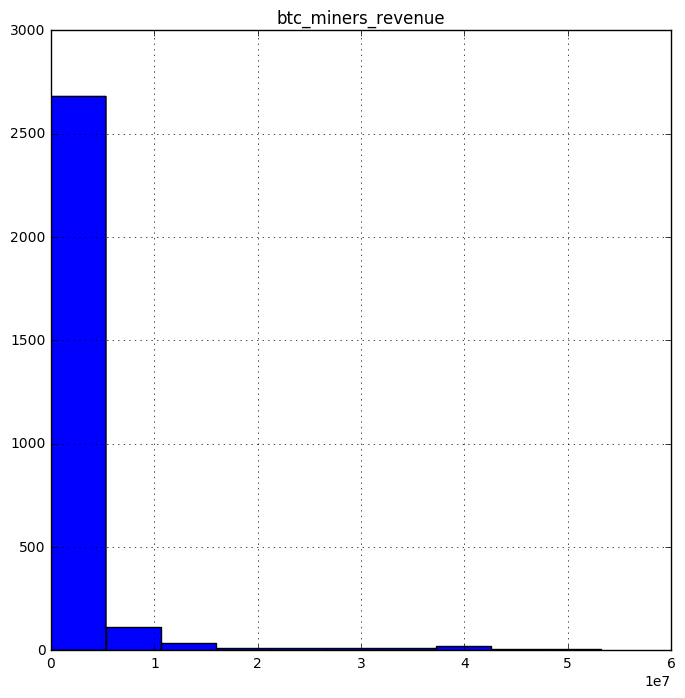

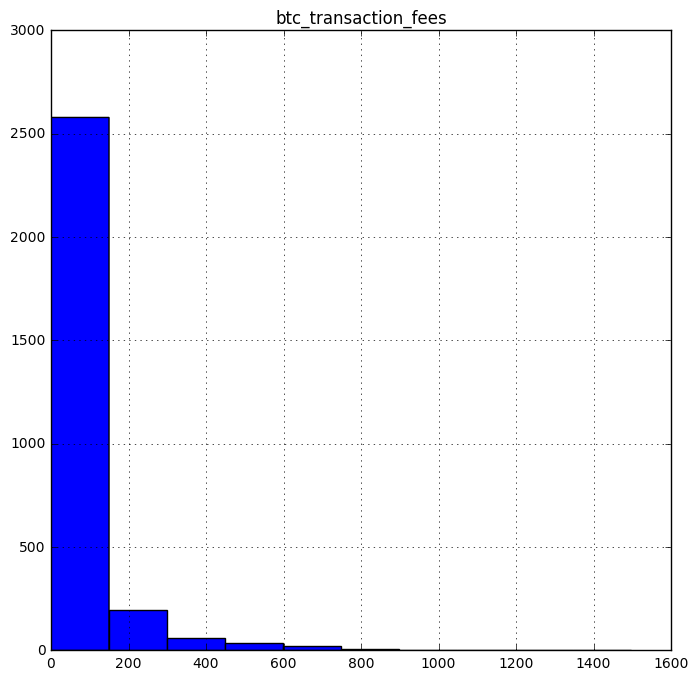

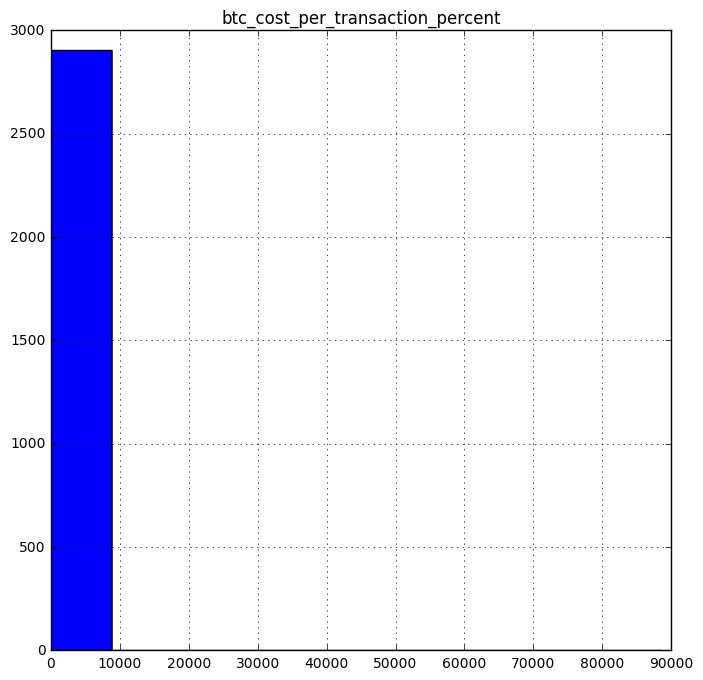

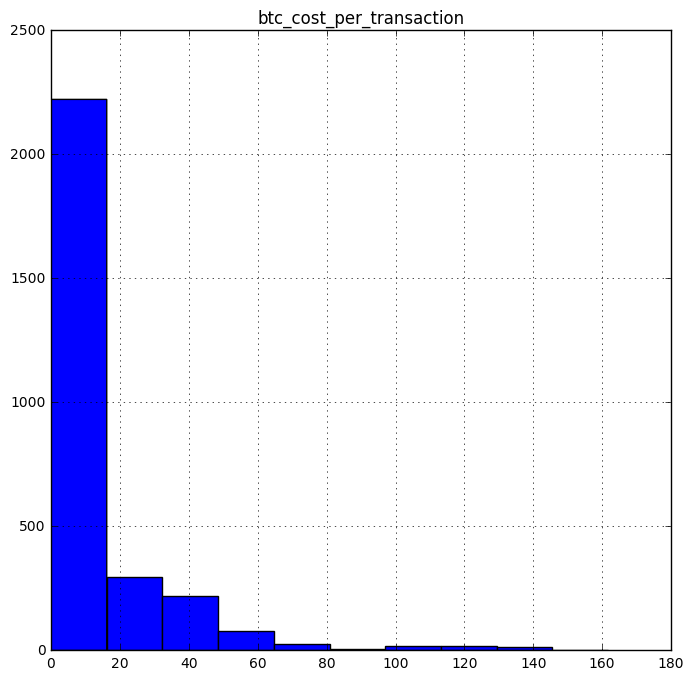

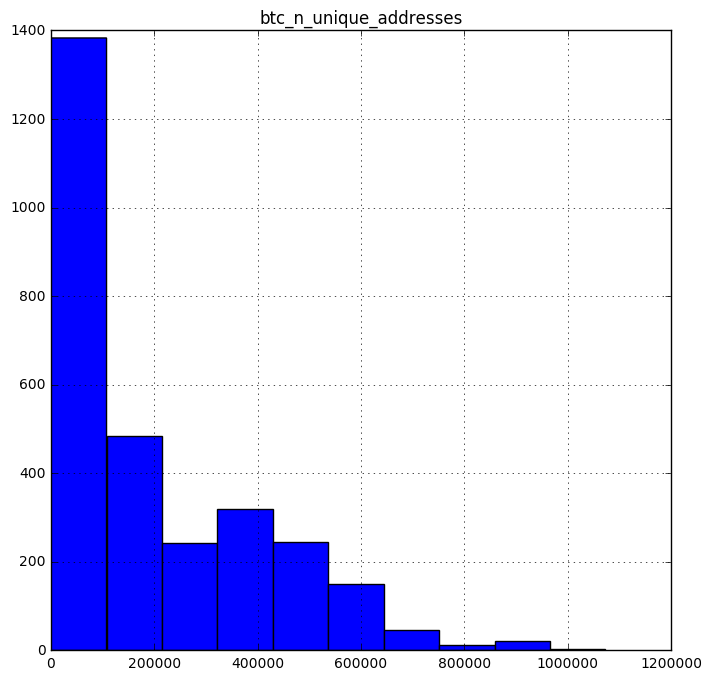

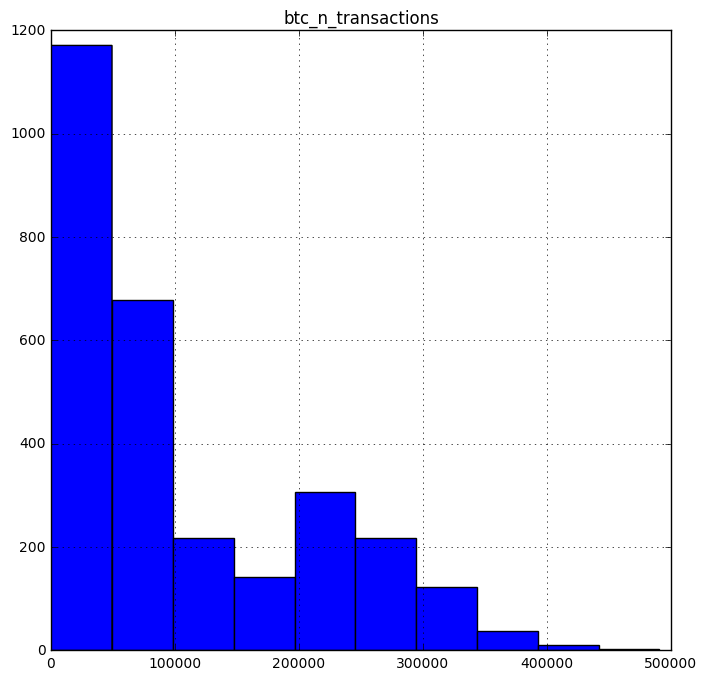

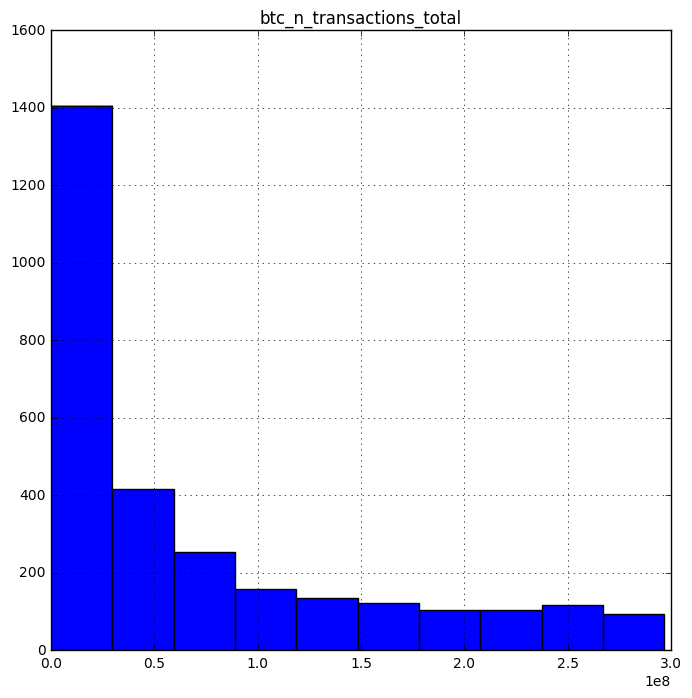

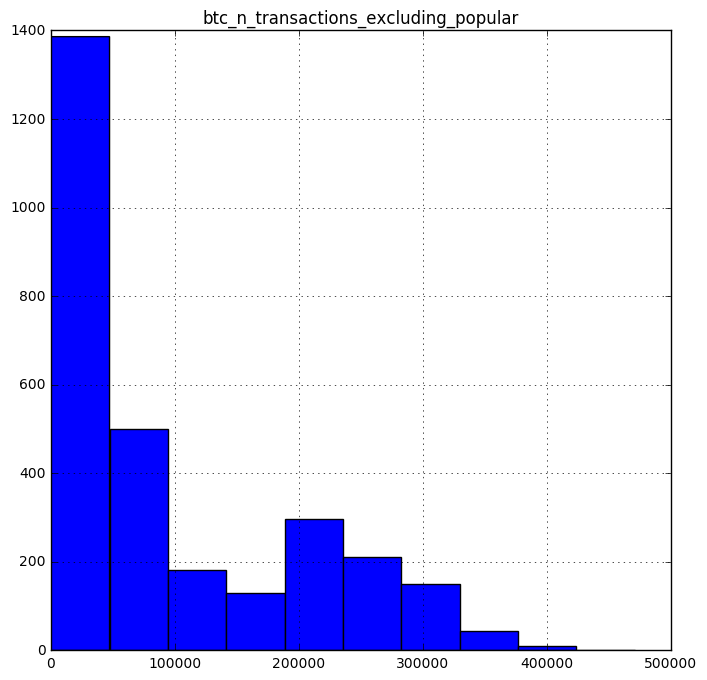

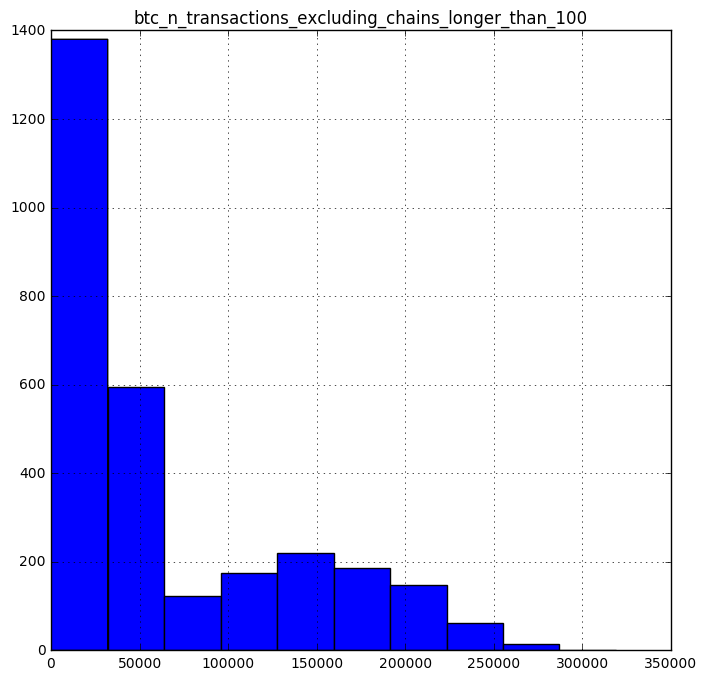

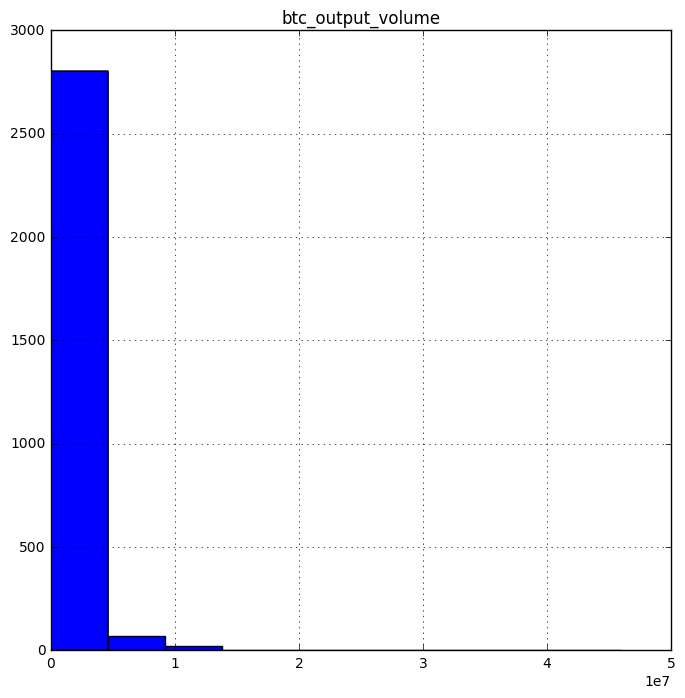

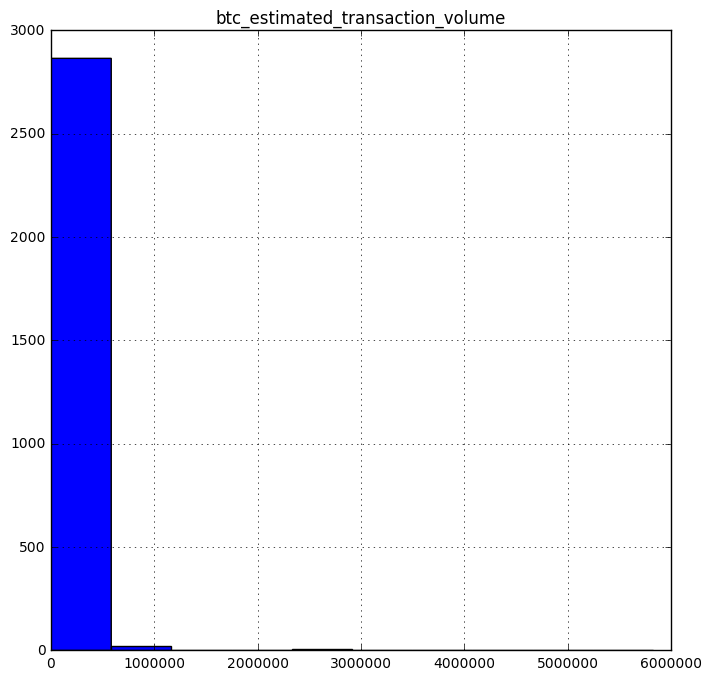

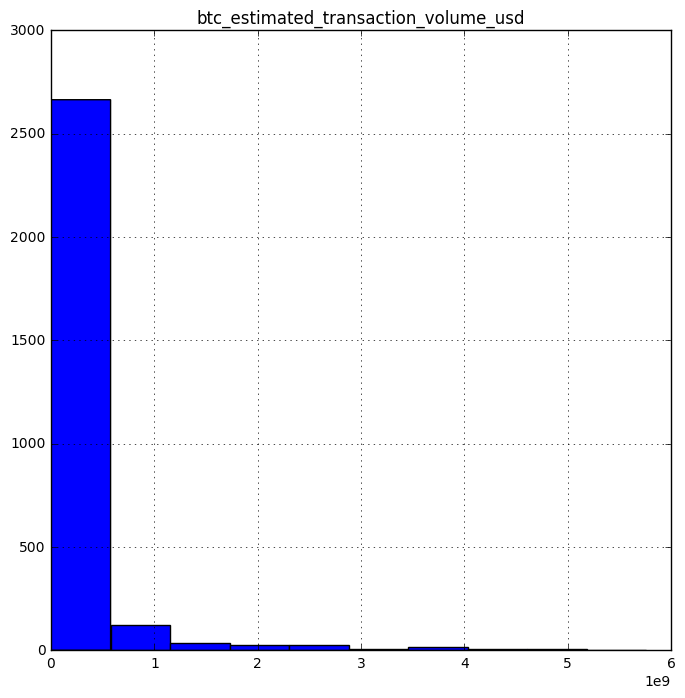

In [20]:
column_list = list(data_filled_KNN.columns.values)

# Simple for loop which plots histograms for all the columns in the dataset
for i in range(0,len(data.iloc[0,:])):
    data_filled_KNN.hist(column_list[i],        # Column to plot
              figsize=(8,8),         # Plot size
              color="blue") 

In [21]:
# We see that there are around 180 rows in which bitcoin price is 0, we can remove these from the dataset. 
# These wont help in understanding the variation in btc_price compared with all other independent variables
data_filled_KNN = data_filled_KNN[data_filled_KNN['btc_market_price']>0]

# Feature Scaling and Train Test Split of the Original Data
When all the variables are not in the same scale, it is often the case that the model doesnt learn well from these features.
Hence we need to ensure that all the variables are in the same scale. In our case we use the min max scaling method in which all variables are adjusted in such a way that they are between 0 and 1.

In [22]:
################################## Train Test Split of Original Data ###########################

X = data_filled_KNN.drop(['btc_market_price'],axis=1)
Y = data_filled_KNN['btc_market_price']

from sklearn.model_selection import train_test_split
X_train_org,X_test_org,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state =20)
test


#################################### Feature Scaling ###########################################

#When all the variables are not in the same scale, it is often the case that the model doesnt 
#learn well from these features.
#Hence we need to ensure that all the variables are in the same scale. 
#In our case we use the standardized scaling method in which all variables are adjusted in 
#a way that they have unit variance. We choose this method as the bitcoin price is more volatile 
#hence the model can learn better if the range of the variables is a little bit more as compared
#to min max scaling where the range is between 0 and 1

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train_org)
X_test = sc.transform(X_test_org) 
data_test = sc.transform(data_test)


# Linear Regression Analysis

Training Score 0.99995602
Test Score 0.99995278
Train Cross Validation Score 0.99995075
Test Cross Validation Score 0.99995150


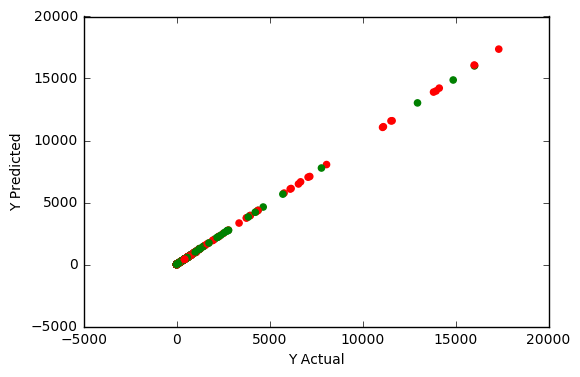

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

linreg_regr = LinearRegression()
fitted = linreg_regr.fit(X_train,Y_train)
y_pred_linreg = fitted.predict(X_test)
print('Training Score {:.8f}'.format(fitted.score(X_train,Y_train)))
print('Test Score {:.8f}'.format(fitted.score(X_test,Y_test)))

rmse_linreg = sqrt(mean_squared_error(Y_test, y_pred_linreg))

from sklearn.model_selection import cross_val_score
scores_linreg_train = cross_val_score(linreg_regr,X_train,Y_train,cv=5)
scores_linreg_test = cross_val_score(linreg_regr,X_test,Y_test,cv=5)
print('Train Cross Validation Score {:.8f}'.format(np.mean(scores_linreg_train)))
print('Test Cross Validation Score {:.8f}'.format(np.mean(scores_linreg_test)))

prediction_linreg = fitted.predict(data_test)

import matplotlib.pyplot as plt

plt.figure()
plt.xlabel('Y Actual')
plt.ylabel('Y Predicted')
plt.scatter(Y_test,y_pred_linreg,color=['red','green'])
plt.show()



# Ridge Regression with Cross Validation and Grid Search(alpha param)

Training Score 0.99657812
Test Score 0.99575753
Best parameters{'alpha': 0.01}
Best score 0.99991014


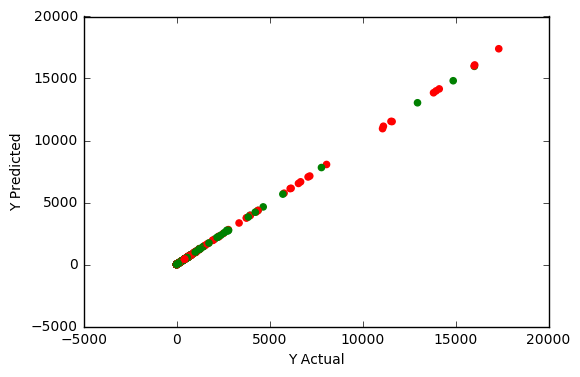

In [43]:

from sklearn.linear_model import Ridge
ridge_regr = Ridge()
ridge_regr.fit(X_train,Y_train)
print('Training Score {:.8f}'.format(ridge_regr.score(X_train,Y_train)))
print('Test Score {:.8f}'.format(ridge_regr.score(X_test,Y_test)))


from sklearn.model_selection import GridSearchCV
ridge_cv = Ridge()
param_grid = {'alpha': [0.01,1,5,10,100,2000]}
grid_search = GridSearchCV(ridge_cv,param_grid,cv=5)
grid_search.fit(X_train,Y_train)
              
y_pred_ridge = grid_search.predict(X_test)

print('Best parameters{}'.format(grid_search.best_params_))
print('Best score {:.8f}'.format(grid_search.best_score_))  

rmse_ridge = sqrt(mean_squared_error(Y_test,y_pred_ridge))

prediction_ridgegrid = grid_search.predict(data_test)



import matplotlib.pyplot as plt

plt.figure()
plt.xlabel('Y Actual')
plt.ylabel('Y Predicted')
plt.scatter(Y_test,y_pred_ridge,color=['red','green'])
plt.show()


# Lasso Regression with Cross Validation and Grid Search(aplha param)

Training Score 0.99989742
Test Score 0.99990015
Best parameters{'alpha': 1}
Best Score 0.99988944


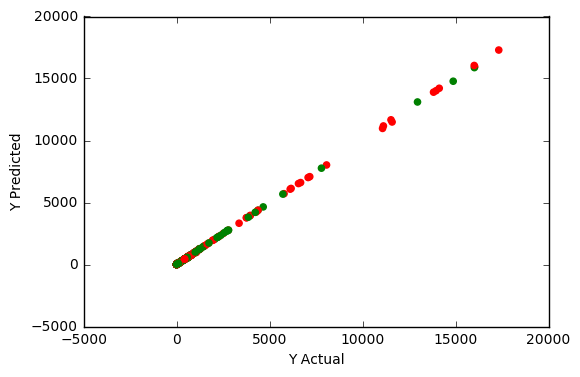

In [44]:
from sklearn.linear_model import Lasso
lasso_regr = Lasso(max_iter = 100000)
lasso_regr.fit(X_train,Y_train)
print('Training Score {:.8f}'.format(lasso_regr.score(X_train,Y_train)))
print('Test Score {:.8f}'.format(lasso_regr.score(X_test,Y_test)))


from sklearn.model_selection import GridSearchCV
lasso_cv = Lasso(max_iter = 100000)
param_grid = {'alpha':[1,5,10,20,100,2000]}
grid_search_ls = GridSearchCV(lasso_cv,param_grid,cv = 5)
grid_search_ls.fit(X_train,Y_train)  
            
y_pred_lasso = grid_search_ls.predict(X_test)              

print('Best parameters{}'.format(grid_search_ls.best_params_))
print('Best Score {:.8f}'.format(grid_search_ls.best_score_))

rmse_lasso = sqrt(mean_squared_error(Y_test,y_pred_lasso))

prediction_lassgrid = grid_search_ls.predict(data_test)
              


import matplotlib.pyplot as plt

plt.figure()
plt.xlabel('Y Actual')
plt.ylabel('Y Predicted')
plt.scatter(Y_test,y_pred_lasso,color=['red','green'])
plt.show()


# KNN Regressor

Training Score 0.99672513
Test Score 0.99354136
Train Cross Validation Score 0.99337309
Test Cross Validation Score 0.97317008


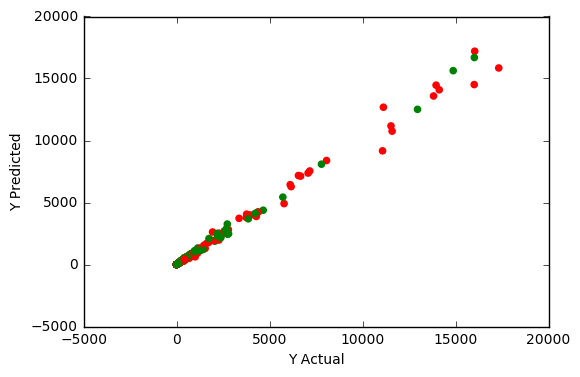

In [45]:

from sklearn.neighbors import KNeighborsRegressor

knn_regr = KNeighborsRegressor(n_neighbors = 5).fit(X_train,Y_train)
y_pred_knn = knn_regr.predict(X_test)
print('Training Score {:.8f}'.format(knn_regr.score(X_train,Y_train)))
print('Test Score {:.8f}'.format(knn_regr.score(X_test,Y_test)))


from sklearn.model_selection import cross_val_score
scores_knn_train = cross_val_score(knn_regr,X_train,Y_train,cv=5)
scores_knn_test = cross_val_score(knn_regr,X_test,Y_test,cv=5)
print('Train Cross Validation Score {:.8f}'.format(np.mean(scores_knn_train)))
print('Test Cross Validation Score {:.8f}'.format(np.mean(scores_knn_test)))

prediction_knnreg = knn_regr.predict(data_test)
rmse_knn = sqrt(mean_squared_error(Y_test,y_pred_knn))


import matplotlib.pyplot as plt

plt.figure()
plt.xlabel('Y Actual')
plt.ylabel('Y Predicted')
plt.scatter(Y_test,y_pred_knn,color=['red','green'])
plt.show()



# Polynomial Features with Linear and Ridge Regressors

#### 1) Linear Regression with Polynomial features

Training Score 0.99999768
Test Score 0.99999466


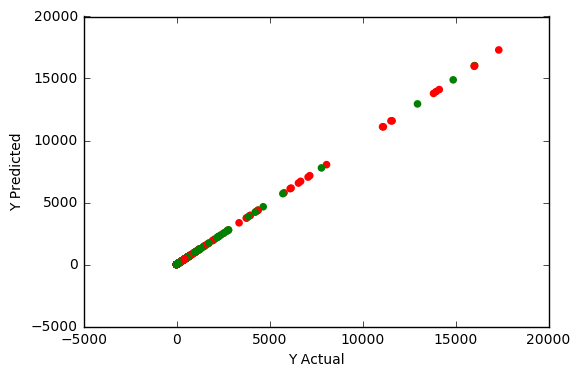

In [46]:
########################################### Linear Regression with Polynomial Features #####################################

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
data_test_poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

data_test_poly = data_test_poly.fit_transform(data_test)

from sklearn.linear_model import LinearRegression
linreg_poly = LinearRegression()
fit_linreg_poly = linreg_poly.fit(X_train_poly,Y_train)
y_pred_polylin = fit_linreg_poly.predict(X_test_poly)
print('Training Score {:.8f}'.format(fit_linreg_poly.score(X_train_poly,Y_train)))
print('Test Score {:.8f}'.format(fit_linreg_poly.score(X_test_poly,Y_test)))


rmse_polylin = sqrt(mean_squared_error(Y_test,y_pred_polylin))
prediction_polylinreg = linreg_poly.predict(data_test_poly)


import matplotlib.pyplot as plt

plt.figure()
plt.xlabel('Y Actual')
plt.ylabel('Y Predicted')
plt.scatter(Y_test,y_pred_polylin,color=['red','green'])
plt.show()



#### 2) Ridge Regression with Polynomial Features

Training Score 1.00
Test Score 1.00
Best parameters{'alpha': 0.01}
Best score 0.99991014
Train Cross Validation Score 0.99997967
Test Cross Validation Score 0.98840481


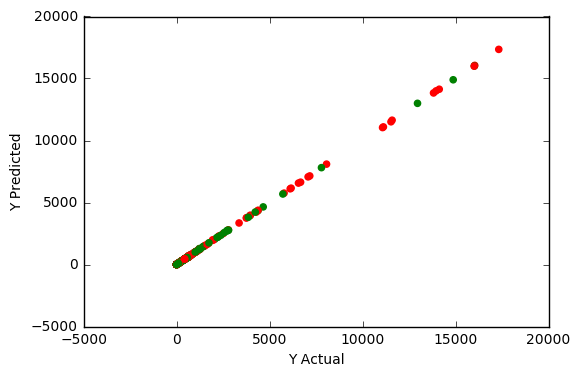

In [47]:
########################################### Ridge Regression with Polynomial Features #####################################

from sklearn.linear_model import Ridge
ridge_poly = Ridge()
fit_ridge_poly = ridge_poly.fit(X_train_poly,Y_train)
print('Training Score {:.2f}'.format(fit_ridge_poly.score(X_train_poly,Y_train)))
print('Test Score {:.2f}'.format(fit_ridge_poly.score(X_test_poly,Y_test)))


from sklearn.model_selection import GridSearchCV
poly_ridge_cv = Ridge()
param_grid = {'alpha': [0.01,1,5,10,100,2000]}
grid_search_polyridge = GridSearchCV(poly_ridge_cv,param_grid,cv=5)
grid_search_polyridge.fit(X_train_poly,Y_train)
              
y_pred_polyridge = grid_search_polyridge.predict(X_test_poly)

print('Best parameters{}'.format(grid_search.best_params_))
print('Best score {:.8f}'.format(grid_search.best_score_))  

from sklearn.model_selection import cross_val_score
scores_linreg_poly_train = cross_val_score(linreg_poly,X_train_poly,Y_train,cv=5)
scores_linreg_poly_test = cross_val_score(linreg_poly,X_test_poly,Y_test,cv=5)
print('Train Cross Validation Score {:.8f}'.format(np.mean(scores_linreg_poly_train)))
print('Test Cross Validation Score {:.8f}'.format(np.mean(scores_linreg_poly_test)))

rmse_ridgepoly = sqrt(mean_squared_error(Y_test,y_pred_polyridge))


import matplotlib.pyplot as plt

plt.figure()
plt.xlabel('Y Actual')
plt.ylabel('Y Predicted')
plt.scatter(Y_test,y_pred_polyridge,color=['red','green'])
plt.show()


# Support Vector Regression Analysis

#### 1) Linear Kernel

Best params {'C': 2000, 'epsilon': 0.1}
Best score 0.99957358
Training Score 0.99969546
Test Score 0.99972405


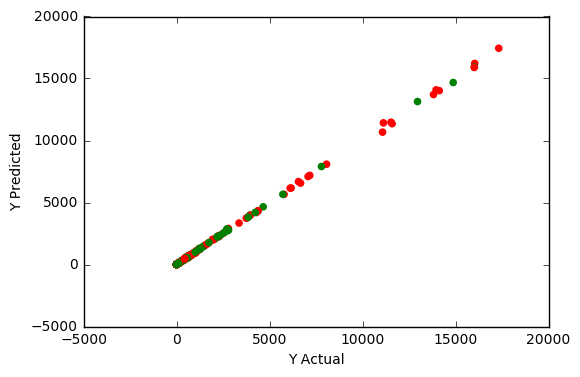

In [48]:
from sklearn.svm import SVR
svr = SVR(kernel = 'linear')
param_grid = {'C':[0.1,1,10,100,2000],'epsilon':[0.01,0.1,1,10,100]}
grid_search_svr = GridSearchCV(svr,param_grid,cv=10)              
grid_search_svr.fit(X_train,Y_train)
y_pred_svrlin = grid_search_svr.predict(X_test) 

print('Best params {}'.format(grid_search_svr.best_params_))
print('Best score {:.8f}'.format(grid_search_svr.best_score_))

print('Training Score {:.8f}'.format(grid_search_svr.score(X_train,Y_train)))
print('Test Score {:.8f}'.format(grid_search_svr.score(X_test,Y_test)))

rmse_svrlin = sqrt(mean_squared_error(Y_test,y_pred_svrlin))


import matplotlib.pyplot as plt

plt.figure()
plt.xlabel('Y Actual')
plt.ylabel('Y Predicted')
plt.scatter(Y_test,y_pred_svrlin,color=['red','green'])
plt.show()


#### 2) RBF Kernel

Best params {'C': 2000, 'gamma': 0.1}
Best score 0.99510986
Training Score 0.99560126
Test Score 0.99603208


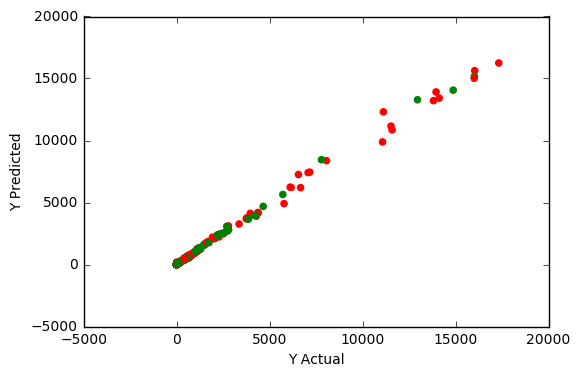

In [49]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf')
param_grid_svr_rbf = {'C':[0.01,1,10,100,2000],'gamma':[0.01,0.1,1,10,100]}
grid_search_svr_rbf = GridSearchCV(svr_rbf,param_grid_svr_rbf,cv = 10)
grid_search_svr_rbf.fit(X_train,Y_train)
y_pred_svr_rbf = grid_search_svr_rbf.predict(X_test)


print('Best params {}'.format(grid_search_svr_rbf.best_params_))
print('Best score {:.8f}'.format(grid_search_svr_rbf.best_score_))

print('Training Score {:.8f}'.format(grid_search_svr_rbf.score(X_train,Y_train)))
print('Test Score {:.8f}'.format(grid_search_svr_rbf.score(X_test,Y_test)))


rmse_svr_rbf = sqrt(mean_squared_error(Y_test,y_pred_svr_rbf))


import matplotlib.pyplot as plt

plt.figure()
plt.xlabel('Y Actual')
plt.ylabel('Y Predicted')
plt.scatter(Y_test,y_pred_svr_rbf,color=['red','green'])
plt.show()


# Decision - Choosing the best regressor on RMSE
Here we decide the best regressor looking at the RMSE values. We use this regressor to predict bitcoin market price for the test set given to us.

In [50]:
decision = [rmse_svr_rbf,rmse_svrlin,rmse_ridgepoly,rmse_polylin,rmse_lasso,rmse_ridge,rmse_knn,rmse_linreg]
decision.sort() # We see that polynomial regressors work the best, linear followed by ridge 

# We will use the linear polynomial regressor to predict for the test set given to us
prediction_polylinreg = linreg_poly.predict(data_test_poly)
print(prediction_polylinreg)

# An important point note is the next best is the polynomial ridge regressor 


[9090.39441015 8889.75210195 9108.03106876 8481.35888618 6905.12421482
 7674.23576603 8093.75320087 8250.23853791 8583.17595888 8355.00301813
 8459.06965858 8866.00274147 8657.65791869 9356.81323228]
